Metode polinomial:
Suhu tertinggi terjadi di jam 22.36 sebesar 94.44°C 
Orde = 9 
Persamaan = 8.7777e-20x^9 + -2.0112e-16x^8 + 1.9174e-13x^7 + -9.8817e-11x^6 + 2.9982e-08x^5 + -5.4711e-06x^4 + 5.8372e-04x^3 + -0.0325x^2 + 0.7261x + 70 
kesalahan relatif = 3.80e-09%

Metode T= a+b*sin(t)):
Suhu tertinggi terjadi di jam 22.42 sebesar 91.21°C 
dengan persamaan T = 79.9935 + (-11.2187)*sin(t) dan kesalahan relatif =48.40%


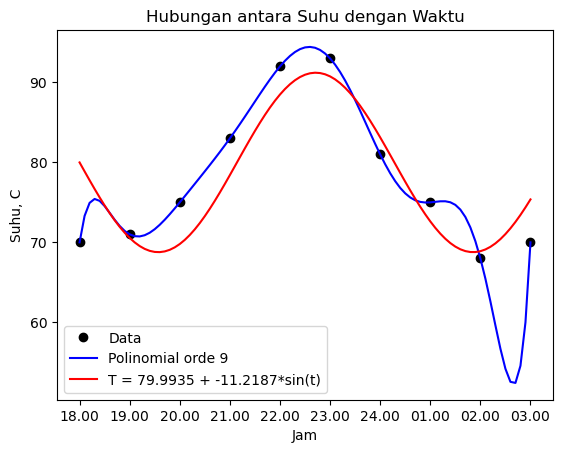

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct 13 12:51:52 2023

@author: Gregorius Savio F R
UTS Pemrograman Komputer lanjut Ganjil 2022/2023
NIM : 21/473405/TK/52174
"""
import numpy as np
import matplotlib.pyplot as pt
from scipy.interpolate import interp1d as ipd
from scipy.optimize import curve_fit as cv

jam = np.array(['18.00','19.00','20.00','21.00','22.00',\
                '23.00','24.00','01.00','02.00','03.00'])
suhu = np.array([70,71,75,83,92, 93,81,75,68,70])

n = len(suhu)
t = np.linspace(0,9,n)*60 #menit
tspan =np.linspace(0,9,91)*60 #menit

#a. Polinomial
k = 0
err = 2
while err>0.01:
    k = k+1
    p = np.polyfit(t, suhu, k)
    Tpers_pol = np.polyval(p, t)
    err = sum(abs(suhu-Tpers_pol)/suhu*100)

T_pol = np.polyval(p, tspan)
Tmax_pol = np.max(T_pol)
imax_pol = np.argmax(T_pol)
jam_pol = 18 + tspan[imax_pol]//60
menit_pol = tspan[imax_pol]%60

#b.  = a+b*sin(t)
def sin(x,a,b):
    return a+b*np.sin(x/60)

a,b = cv(sin,t,suhu)[0]
Tpers_sin = sin(t, a, b)
err_sin = sum(abs(suhu-Tpers_sin)/suhu*100)

T_sin = sin(tspan, a, b)
Tmax_sin = np.max(T_sin)
imax_sin = np.argmax(T_sin)
jam_sin = 18 + tspan[imax_sin]//60
menit_sin = tspan[imax_sin]%60

pt.plot(jam,suhu,'o',color='black',label='Data')
pt.plot(tspan/60,T_pol,color='blue',\
        label='Polinomial orde {:.0f}'.format(k))
pt.plot(tspan/60,T_sin,color='red',\
        label='T = {:.4f} + {:.4f}*sin(t)'.format(a,b))
pt.xlabel('Jam')
pt.ylabel('Suhu, C')
pt.title('Hubungan antara Suhu dengan Waktu')
pt.legend()

print('Metode polinomial:\n\
Suhu tertinggi terjadi di jam {:.0f}.{:.0f} sebesar {:.2f}°C \n\
Orde = {:.0f} \n\
Persamaan = {:.4e}x^9 + {:.4e}x^8 + {:.4e}x^7 + {:.4e}x^6 + \
{:.4e}x^5 + {:.4e}x^4 + {:.4e}x^3 + {:.4f}x^2 + {:.4f}x + {:.0f} \n\
kesalahan relatif = {:.2e}%'\
      .format(jam_pol,menit_pol,Tmax_pol, k, *p ,err))
print()
print('Metode T= a+b*sin(t)):\n\
Suhu tertinggi terjadi di jam {:.0f}.{:.0f} sebesar {:.2f}°C \n\
dengan persamaan T = {:.4f} + ({:.4f})*sin(t) dan kesalahan relatif =\
{:.2f}%'.format(jam_sin,menit_sin,Tmax_sin, a,b, err_sin))

Dari grafik di atas, terlihat bahwa metode polinomial orde 9 lebih akuran dibandingkan menggunakan persamaan T = a+b*sin(t). 

Hal ini ditunjukan oleh titik-titik data yang lebih mendekati grafik persamaan polinomial orde 9 dibandingkan persamaan T = a+b*sin(t).

Selain itu, nilai kesalahan relatif dengan metode polinomial orde 9 adalah 3,80e-09% yang sudah mendekati nol, sedangkan nilai kesalahan realtif dengan persamaan adalah 48,40%. Nilai kesalahan relatif dari metode persamaan sin masih jauh dari 0% sehingga data yang didapatkan kurang akurat dibandingkan dengan metode polinomial orde 9.